In [1]:
##IMPORT PACKAGES
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pylab as plt

In [2]:
##IMPORT AND TRANSFORM DATA

#import .csv and create cust_test_df
ubank_df = pd.read_csv('UniversalBank.csv')
data = {'ID': [5001], 'ZIP.Code': [43016],
                          'Age': [40],
                          'Experience': [10],
                          'Income': [84],
                          'Family': [2],
                          'CCAvg': [2],
                          'Mortgage': [0],
                          'Securities Account': [0],
                          'CD Account': [0],
                          'Online': [1],
                          'CreditCard': [1],
                          'Education_1': [0],
                          'Education_2': [1],
                          'Education_3': [0],
                          'Personal Loan': [1]}
cust_test_df = pd.DataFrame(data=data)

#converting Education into dummy variable and adding to dataset
dummy = pd.get_dummies(ubank_df['Education']).rename(columns=lambda x: 'Education_' + str(x))
ubank_df = pd.concat([ubank_df, dummy], axis =1)
ubank_df = ubank_df.drop(['Education'],axis=1)

#reorder columns so PersonalLoan is [:-1]
ubank_df = ubank_df[['ID', 'ZIP Code', 'Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3', 'Personal Loan']]

In [3]:
##SPLIT AND SCALE
#split
X = ubank_df.iloc[:,2:-1]
y = ubank_df.iloc[:,-1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.4, random_state=6011)
#prepare x and y for cust_test
X_cust = cust_test_df.iloc[:,2:-1]
y_cust = pd.DataFrame(data=cust_test_df.iloc[:,-1])

#normalization
scaler = preprocessing.StandardScaler()
scaler.fit(X_train[['Age','Experience','Income','Family','CCAvg','Mortgage']])
ubanknorm = pd.concat([pd.DataFrame(scaler.transform(X[['Age','Experience','Income','Family','CCAvg','Mortgage']]),
                                   columns = ['zAge','zExperience','zIncome','zFamily','zCCAvg','zMortgage']),
                       X[['Securities Account', 'CD Account', 'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3']]], axis=1)
trainNorm = ubanknorm.iloc[X_train.index]
validNorm = ubanknorm.iloc[X_val.index]

In [4]:
##CLASSIFICATION FOR CUSTOMER
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_cust)
print(y_pred)
#Explain how this customer would be classified.
    #This customer would be classified as unlikely to accept a personal loan if offered.

[0]


[0.0295, 0.0385, 0.027, 0.039, 0.0325, 0.039, 0.0355, 0.0435, 0.038, 0.044, 0.0415, 0.0455, 0.0415, 0.044, 0.041, 0.048, 0.044, 0.0515, 0.048, 0.054, 0.051, 0.0555, 0.053, 0.057, 0.0545, 0.0595, 0.0585, 0.061, 0.058, 0.062, 0.0595, 0.0625, 0.0605, 0.0625, 0.062, 0.063, 0.0615, 0.063, 0.062]


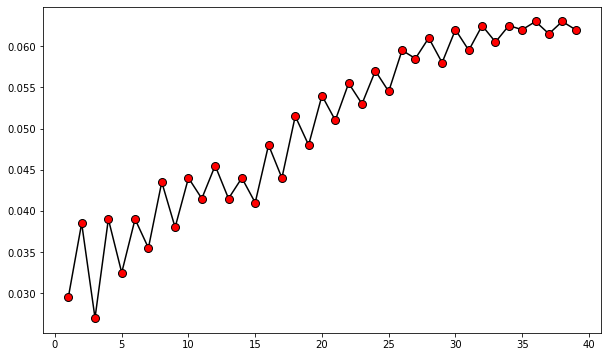

In [5]:
##CLASSIFICATION AND CONFUSION MATRIX FOR BEST K
error = []

for i in range (1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(trainNorm, y_train)
    pred_i = knn.predict(validNorm)
    error.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error, color='black', marker = 'o', markersize=8, markerfacecolor='red')


print(error)

#Discuss the choice of k that balances between overfitting and ignoring the predictor information
    #K = 3 appears to be the best fit, having the lowest error rate, but enough of a sample to avoid overfitting.

In [6]:
#Show the confusion matrix for the validation data that results from using the best k and explain different error types that you observe.
##kNN USING K = 3
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(trainNorm, y_train)
y_pred = classifier.predict(validNorm)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

    #This algorithm correctly predicted 97% of customers. There were, however, 2 customers who were predicted as Yes, when they were actually no. This is called a "False Positive"
    #In addition, we saw 52 customers who were incorrectly predicted as no when they were actually a yes. This type of error is called "False Negative"

[[1816    2]
 [  52  130]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1818
           1       0.98      0.71      0.83       182

    accuracy                           0.97      2000
   macro avg       0.98      0.86      0.91      2000
weighted avg       0.97      0.97      0.97      2000



In [7]:
##CLASSIFICATION FOR CUSTOMER WITH BEST K
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(trainNorm, y_train)

y_pred = classifier.predict(X_cust)
print(y_pred)

    #This customer would be classified as likely to accept a personal loan if offered.

[1]


In [8]:
##REPARTITION DATA INTO TRAINING, VALIDATION AND TEST SETS
X = ubank_df.iloc[:,2:-1]
y = ubank_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=6011)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .375, random_state=6011)
#prepare x and y for cust_test
X_cust = cust_test_df.iloc[:,2:-1]
y_cust = pd.DataFrame(data=cust_test_df.iloc[:,-1])

#normalization
scaler = preprocessing.StandardScaler()
scaler.fit(X_train[['Age','Experience','Income','Family','CCAvg','Mortgage']])
ubanknorm = pd.concat([pd.DataFrame(scaler.transform(X[['Age','Experience','Income','Family','CCAvg','Mortgage']]),
                                   columns = ['zAge','zExperience','zIncome','zFamily','zCCAvg','zMortgage']),
                       X[['Securities Account', 'CD Account', 'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3']]], axis=1)
trainNorm = ubanknorm.iloc[X_train.index]
validNorm = ubanknorm.iloc[X_val.index]
testNorm = ubanknorm.iloc[X_test.index]

In [9]:
#CONFUSION MATRIX
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(trainNorm, y_train)
y_pred = classifier.predict(testNorm)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

    #Similar to the previous partition, this algorithm correctly predicted 97% of customers 
    #The big difference here is this algorithm had no False Positives. This outcome is preferable beecause we can say with higher ceratinty that our model accurately predicts a "Yes"

[[900   0]
 [ 29  71]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       900
           1       1.00      0.71      0.83       100

    accuracy                           0.97      1000
   macro avg       0.98      0.85      0.91      1000
weighted avg       0.97      0.97      0.97      1000

